In [1]:
#====================================================================================================================
#
# Program ID :  EDA.IPYNB
# Description:  FOR AIAP ASSESSMENT 2
#               TASK 1 - EXPLORATORY DATA ANALYSIS (EDA)
#               
# OUTLINE    :  THIS PROGRAM CONTAINS THE FOLLOWING KEY PROCESSES
#               (1) IMPORT LIBRARIES AND INITIALISATION
#               (2) READ IN DATA AND VERIFICATION
#               (3) ESSENTIAL DATA CLEANING AND TRANSFORMATION
#
#               (4) EXPLORE QUALITATIVE CATEGORICAL PREDICTORS AND RESPONSE VARIABLES (Pie charts)
#               (5) EXPLORE QUANTITATIVE CONTINUOUS AND DISCRETE PREDICTORS (Corelation, Heatmap and Pairplots)
#               (6) EXPLORE PREDICTORS AND RESPONSE (Box plots)
#
#               (7) CONCLUSION AND FOLLOWUP TO TASK 2
#
#====================================================================================================================

In [2]:
# (1) IMPORT LIBRARIES AND INITIALISATION
# ===================================================================================================================

# Numeric python library which is useful for arrays, computation and manipulation purposes.
import numpy as np 

# Library that supports data frames, reading and writing of database and files
import pandas as pd
import sqlite3

# Libraries used for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Disable warning, after verification and all in order
import warnings
warnings.filterwarnings("ignore")

In [3]:
# (2) READ IN DATA AND VERIFICATION
# ===================================================================================================================

# Attempt to connect to the SQLite attrition database
try:
    conn = sqlite3.connect("data/attrition.db")  

# Print the exception for followup, if the connection attempt is unsuccessful
except Exception as err:
    print(err)
      
# For successful connection, read the attrition into data frame for subsequent data exploration.
cursor = conn.cursor()
df_raw = pd.read_sql_query('SELECT * FROM attrition', conn)

# Close db connection
conn.close()

In [4]:
# Verify the shape (with number of rows and columns) of the attrition data frame
df_raw.shape

(2470, 14)

In [5]:
# The previous steps shows that there are 2470 rows and 14 columns.

# Below command displasy the last 5 observations to get a snap of the record details
df_raw.tail()

,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time
2465,853c0e3d-102d-4f0a-8eaf-77ab3ee6eb9e,0,55,Male,7168,0.4 hours,Master,Medical,3,Changi,Bronze,10,-1,5
2466,ffaa8f3e-845c-4609-86ba-c64162fd08be,1,28,Male,9138,53.61316468923773 mins,Diploma,Engineering,3,Changi,Normal,11,1994,3
2467,df9097af-60f5-4654-b479-75ce35ef2c9b,0,55,Male,11845,0.5 hours,Master,Engineering,3,Thomson,Normal,4,1967,5
2468,5675bfe3-c90a-47bb-b6c2-5d6e2005ef54,0,42,Female,12579,31.884495613579915 mins,Bachelor,Business,1,Changi,Silver,5,1980,2
2469,2a7a16fb-d1dd-46d9-a3ad-4f5f7c3c0d3c,1,-1,Female,3938,21.88522209192417 mins,Bachelor,Science,3,Kranji,Silver,33,1986,3


In [6]:
# It was observed that some occurrences of Travel Time are in hours, while others are in mins. 

# To understand the data types of the columns, and if there is any null values
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Member Unique ID  2470 non-null   object
 1   Attrition         2470 non-null   int64 
 2   Age               2470 non-null   int64 
 3   Gender            2470 non-null   object
 4   Monthly Income    2470 non-null   int64 
 5   Travel Time       2470 non-null   object
 6   Qualification     2470 non-null   object
 7   Work Domain       2470 non-null   object
 8   Usage Rate        2470 non-null   int64 
 9   Branch            2470 non-null   object
 10  Membership        2470 non-null   object
 11  Months            2470 non-null   int64 
 12  Birth Year        2470 non-null   int64 
 13  Usage Time        2470 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 270.3+ KB


In [7]:
# The previous steps shows that there are no null values

# Next, all descriptive details were generated:
#     -  For categorical variables (aka object Dtype), the total record count, the number of unique values, 
#        the values with the highest occurrence and its frequencies were generated
#     -  For continuous variables  (aka int64, float), the total record count, mean, std, min and max, interquartile range were
#        generated

df_raw.describe(include='all')

,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time
count,2470,2470.000000,2470.000000,2470,2470.000000,2470,2470,2470,2470.000000,2470,2470,2470.000000,2470.000000,2470.000000
unique,2470,NaN,NaN,2,NaN,525,7,6,NaN,3,4,NaN,NaN,NaN
top,1d172e75-2c13-4b73-a1da-18d442a10bf7,NaN,NaN,Male,NaN,0.7 hours,Bachelor,Engineering,NaN,Thomson,Normal,NaN,NaN,NaN
freq,1,NaN,NaN,1460,NaN,269,891,966,NaN,1549,1492,NaN,NaN,NaN
mean,NaN,0.169636,35.970850,NaN,5143.199595,NaN,NaN,NaN,2.780972,NaN,NaN,10.634413,1734.040486,4.846964
std,NaN,0.375388,16.757217,NaN,6542.273046,NaN,NaN,NaN,1.033757,NaN,NaN,9.225734,655.077597,3.925911
min,NaN,0.000000,-1.000000,NaN,-24620.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,-1.000000,0.000000
25%,NaN,0.000000,29.000000,NaN,2610.000000,NaN,NaN,NaN,2.000000,NaN,NaN,5.000000,1969.000000,2.000000
50%,NaN,0.000000,38.000000,NaN,4785.000000,NaN,NaN,NaN,3.000000,NaN,NaN,8.000000,1980.000000,4.000000
75%,NaN,0.000000,48.000000,NaN,7981.750000,NaN,NaN,NaN,4.000000,NaN,NaN,13.000000,1988.000000,6.000000


In [8]:
# Observations from the above preliminary data verification:
#
# (i)   Column "Attrition" is the response variable, with values "0" (No) and "1" (Yes). As it is numeric, python set 
#       it as INT64. It is necessary to convert the dtype to Object (Categorical).
#
# (ii)  Need to standardise the "Travel Time" data to a common unit (either hours or mins).
#
# (iii) Minimum value of "Age" and "Birth Year" are -1, which should not be negative. To further investigate if 
#       these are missing values or errors.
#
# (iv) Column "Member Unique ID" is an unique identifier for each observations, and is not meaningful for data mining.
#
# (iv) The minimum value of "Monthly Income" is negative (-24620). According to the metadata documentation, this is
#      the declared income of the member in SGD. It might be the nett from income and expenditure, and thus the 
#      negative amount might be interpreted as more expenses than income, which might be a possible scenario.
#
# These observations (i) to (iv) will be transformed and follow-up in next process 3.
#
# End of (2) READ IN DATA AND VERIFICATION
# ===================================================================================================================

In [9]:
# (3) ESSENTIAL DATA CLEANING AND TRANSFORMATION
# ====================================================================================================================
# It is good to prepare the data, so as to maximise knowledge discovery for the subsequent data exploration processes.

# (i) Recode column "Attrition" response variable, with values "0" as "No Attrition" and "1" as "Attrition". 

# Function to recode the "Attrition" response variable
def recode_attrition(attrition_value):
    if attrition_value == 0:
        attrition_value = 'No Attrition'
    else:
        attrition_value = 'Attrition'
    return attrition_value

# Applying the recode function
df_raw['Attrition']= df_raw['Attrition'].apply(recode_attrition) 

# to verify dtype changed
df_raw.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Member Unique ID  2470 non-null   object
 1   Attrition         2470 non-null   object
 2   Age               2470 non-null   int64 
 3   Gender            2470 non-null   object
 4   Monthly Income    2470 non-null   int64 
 5   Travel Time       2470 non-null   object
 6   Qualification     2470 non-null   object
 7   Work Domain       2470 non-null   object
 8   Usage Rate        2470 non-null   int64 
 9   Branch            2470 non-null   object
 10  Membership        2470 non-null   object
 11  Months            2470 non-null   int64 
 12  Birth Year        2470 non-null   int64 
 13  Usage Time        2470 non-null   int64 
dtypes: int64(6), object(8)
memory usage: 270.3+ KB


In [10]:
# to verify the recoded response variable, the last 5 observations were generated to compare the Attrition values with the
# tail(5) generated in earlier process 2.
df_raw.tail()

,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time
2465,853c0e3d-102d-4f0a-8eaf-77ab3ee6eb9e,No Attrition,55,Male,7168,0.4 hours,Master,Medical,3,Changi,Bronze,10,-1,5
2466,ffaa8f3e-845c-4609-86ba-c64162fd08be,Attrition,28,Male,9138,53.61316468923773 mins,Diploma,Engineering,3,Changi,Normal,11,1994,3
2467,df9097af-60f5-4654-b479-75ce35ef2c9b,No Attrition,55,Male,11845,0.5 hours,Master,Engineering,3,Thomson,Normal,4,1967,5
2468,5675bfe3-c90a-47bb-b6c2-5d6e2005ef54,No Attrition,42,Female,12579,31.884495613579915 mins,Bachelor,Business,1,Changi,Silver,5,1980,2
2469,2a7a16fb-d1dd-46d9-a3ad-4f5f7c3c0d3c,Attrition,-1,Female,3938,21.88522209192417 mins,Bachelor,Science,3,Kranji,Silver,33,1986,3


In [11]:
# (ii) Standardise the data in "Travel Time" column with a common unit (in mins).

# Create a new column "Travel Time (mins)" to store the standardised the Travel Time in mins. 

# Move the houred "Travel Time" to the new column. Convert to min by multiplying 60.
df_raw['Travel Time (mins)'] = df_raw['Travel Time'].str.replace(' hours','') [ (df_raw['Travel Time'].str.contains('hours') ) ]
df_raw['Travel Time (mins)'] = df_raw['Travel Time (mins)'].astype(float) * 60

# Move the remaining minuted "Travel Time" to the new column
df_raw['Travel Time (mins)'].fillna( df_raw['Travel Time'].str.replace(' mins',''), inplace = True)

df_raw['Travel Time (mins)']=df_raw['Travel Time (mins)'].astype(float)

# to verify the new column "Travel Time (mins)"
df_raw.tail()

,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time,Travel Time (mins)
2465,853c0e3d-102d-4f0a-8eaf-77ab3ee6eb9e,No Attrition,55,Male,7168,0.4 hours,Master,Medical,3,Changi,Bronze,10,-1,5,24.000000
2466,ffaa8f3e-845c-4609-86ba-c64162fd08be,Attrition,28,Male,9138,53.61316468923773 mins,Diploma,Engineering,3,Changi,Normal,11,1994,3,53.613165
2467,df9097af-60f5-4654-b479-75ce35ef2c9b,No Attrition,55,Male,11845,0.5 hours,Master,Engineering,3,Thomson,Normal,4,1967,5,30.000000
2468,5675bfe3-c90a-47bb-b6c2-5d6e2005ef54,No Attrition,42,Female,12579,31.884495613579915 mins,Bachelor,Business,1,Changi,Silver,5,1980,2,31.884496
2469,2a7a16fb-d1dd-46d9-a3ad-4f5f7c3c0d3c,Attrition,-1,Female,3938,21.88522209192417 mins,Bachelor,Science,3,Kranji,Silver,33,1986,3,21.885222


In [12]:
# (iii) Investigate and transform the minimum value of "Age" and "Birth Year" (which are are "-1")

# Display the count for negative "-1" value for "Age"
df_raw['Age'] [ df_raw['Age'] == -1].count()


291

In [13]:
# Display the count for negative "-1" value for "Birth Year"
df_raw['Birth Year'] [ df_raw['Birth Year'] == -1].count()

308

In [14]:
# There are 291 counts of "Age" with "-1", out of the total 2470 observations (about 12%)
# These 291 records appears to be observations where "Age" (Age of the member when signing up as a member) is missing or 
# unavailable.

# After some considerations, these 291 counts of "Age" with "-1" shall be imputed with the mean age.


# Common function to set "-1" to missing value
def set_null (na_value):
    if na_value == -1 :
        na_value = None
 
    return na_value

# apply the set_null function for "Age" with "-1"
df_raw['Age']= df_raw['Age'].apply(set_null) 

In [15]:
# Fill the missing value with mean of age

df_raw['Age']=df_raw['Age'].fillna(df_raw['Age'].mean())

In [16]:
# There are 308 counts of "Birth Year" with "-1", out of the total 2470 observations (about 12%)

# After some considerations, these 308 counts of "Birth Year" with "-1" shall be imputed with the mode of Birth Year.
# Mode is chosen in order not to be decial point for the year.

# apply the set_null function for "Birth Year" with "-1"
df_raw['Birth Year']= df_raw['Birth Year'].apply(set_null) 

In [17]:
# Fill the missing value with mode of Birth Year
df_raw['Birth Year']=df_raw['Birth Year'].fillna(df_raw['Birth Year'].mode() [0])

In [18]:
# to verify the transformed column "Age" and "Birth Year"

print ( df_raw['Age'].mean())
print ( df_raw['Birth Year'].mode())

df_raw.tail()

40.90821477742079
0    1980.0
dtype: float64


,Member Unique ID,Attrition,Age,Gender,Monthly Income,Travel Time,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time,Travel Time (mins)
2465,853c0e3d-102d-4f0a-8eaf-77ab3ee6eb9e,No Attrition,55.000000,Male,7168,0.4 hours,Master,Medical,3,Changi,Bronze,10,1980.0,5,24.000000
2466,ffaa8f3e-845c-4609-86ba-c64162fd08be,Attrition,28.000000,Male,9138,53.61316468923773 mins,Diploma,Engineering,3,Changi,Normal,11,1994.0,3,53.613165
2467,df9097af-60f5-4654-b479-75ce35ef2c9b,No Attrition,55.000000,Male,11845,0.5 hours,Master,Engineering,3,Thomson,Normal,4,1967.0,5,30.000000
2468,5675bfe3-c90a-47bb-b6c2-5d6e2005ef54,No Attrition,42.000000,Female,12579,31.884495613579915 mins,Bachelor,Business,1,Changi,Silver,5,1980.0,2,31.884496
2469,2a7a16fb-d1dd-46d9-a3ad-4f5f7c3c0d3c,Attrition,40.908215,Female,3938,21.88522209192417 mins,Bachelor,Science,3,Kranji,Silver,33,1986.0,3,21.885222


In [19]:
# It was observed that observation 2469, its age is successfully imputed with mean.
# It was observed that observation 2465, its birth year is successfully imputed with mode.

# Confirmed all counts were imputed
print (df_raw['Age'] [ df_raw['Age'] == -1].count() )
print (df_raw['Birth Year'] [ df_raw['Birth Year'] == -1].count() )

0
0


In [20]:
# (iv) Drop column "Member Unique ID", which is an unique identifier for each observations, and is not meaningful 
#      for data mining.

# Drop the unmeaningful "Member Unique ID" and Inconsistent "Travel Time" columns
# The inconsistemt "Travel Time" column was replaced by the new column "Travel Time (mins)"

df_interim1 = df_raw.drop(['Member Unique ID','Travel Time'], axis=1)
df_interim1.shape # verification of row and column counts

(2470, 13)

In [21]:
# Based on the metadata documentation provided, "Usage Rate" refers to average number of days in a week the member visited
# the club, and "Usage Time" refers to the average number of hours the member spent each visit.
# Hence, it might be useful to create a interaction term on total hours the member spent each week, by multiplying the above 2 
# variables

# Create a new column "Usage Hours" to store the total hours spent in the club per week
df_interim1['Usage Hours'] = df_interim1['Usage Rate'] * df_interim1['Usage Time'] 
df_interim1.tail()

,Attrition,Age,Gender,Monthly Income,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time,Travel Time (mins),Usage Hours
2465,No Attrition,55.000000,Male,7168,Master,Medical,3,Changi,Bronze,10,1980.0,5,24.000000,15
2466,Attrition,28.000000,Male,9138,Diploma,Engineering,3,Changi,Normal,11,1994.0,3,53.613165,9
2467,No Attrition,55.000000,Male,11845,Master,Engineering,3,Thomson,Normal,4,1967.0,5,30.000000,15
2468,No Attrition,42.000000,Female,12579,Bachelor,Business,1,Changi,Silver,5,1980.0,2,31.884496,2
2469,Attrition,40.908215,Female,3938,Bachelor,Science,3,Kranji,Silver,33,1986.0,3,21.885222,9


In [22]:
# It was observed that the minimum value of 'Usage Time' is 0. Thus, the interaction term created might be 0, after the
# multiplication, even that the "Usage Rate" is non-zero

# Below do a count to check the status of the computed "Usage Time" that are zero
df_interim1['Usage Hours'] [ df_interim1['Usage Hours'] == 0].count()

91

In [23]:
# Final data verification on dtype, rows and columns
df_interim1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Attrition           2470 non-null   object 
 1   Age                 2470 non-null   float64
 2   Gender              2470 non-null   object 
 3   Monthly Income      2470 non-null   int64  
 4   Qualification       2470 non-null   object 
 5   Work Domain         2470 non-null   object 
 6   Usage Rate          2470 non-null   int64  
 7   Branch              2470 non-null   object 
 8   Membership          2470 non-null   object 
 9   Months              2470 non-null   int64  
 10  Birth Year          2470 non-null   float64
 11  Usage Time          2470 non-null   int64  
 12  Travel Time (mins)  2470 non-null   float64
 13  Usage Hours         2470 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 270.3+ KB


In [24]:
# Final data verification for description

df_interim1.describe(include='all')

,Attrition,Age,Gender,Monthly Income,Qualification,Work Domain,Usage Rate,Branch,Membership,Months,Birth Year,Usage Time,Travel Time (mins),Usage Hours
count,2470,2470.000000,2470,2470.000000,2470,2470,2470.000000,2470,2470,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
unique,2,NaN,2,NaN,7,6,NaN,3,4,NaN,NaN,NaN,NaN,NaN
top,No Attrition,NaN,Male,NaN,Bachelor,Engineering,NaN,Thomson,Normal,NaN,NaN,NaN,NaN,NaN
freq,2051,NaN,1460,NaN,891,966,NaN,1549,1492,NaN,NaN,NaN,NaN,NaN
mean,NaN,40.908215,NaN,5143.199595,NaN,NaN,2.780972,NaN,NaN,10.634413,1981.063968,4.846964,32.195937,10.933198
std,NaN,9.909179,NaN,6542.273046,NaN,NaN,1.033757,NaN,NaN,9.225734,9.715639,3.925911,13.853844,6.014360
min,NaN,12.000000,NaN,-24620.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,1953.000000,0.000000,6.000000,0.000000
25%,NaN,34.000000,NaN,2610.000000,NaN,NaN,2.000000,NaN,NaN,5.000000,1975.000000,2.000000,20.000000,6.000000
50%,NaN,40.908215,NaN,4785.000000,NaN,NaN,3.000000,NaN,NaN,8.000000,1980.000000,4.000000,30.000000,12.000000
75%,NaN,48.000000,NaN,7981.750000,NaN,NaN,4.000000,NaN,NaN,13.000000,1988.000000,6.000000,42.000000,16.000000


In [25]:
# Summary of process (3)
#
# (i) Counts Reconciliation
#     Input dataframe : df.raw (2470 rows, 14 columns)
#     Output dataframe: df.interim1 (2470 rows, 14 columns)
#
#     No rows removed as missing "Age" and "Birth Year" are imputed with mean and mode respectively.
#     2 new columns added: "Travel Time (mins)" to store standardised Travel Time in minute unit,"Usage Hours"
#                          create to store interaction term on total hours spent per week in club.
#     2 columns removed  : "Member Unique ID", "Travel Time" columns.
#
#     Thus, the total counts for rows and columns were correct.
#
# (ii) List of data preparation activities carried out are:
#      - Recode column "Attrition" response variable
#      - Standardise the data in "Travel Time" column to the common unit in mins
#      - Replace "Age" with "-1", with the mean of Age
#      - Replace "Birth Year" with "-1", with the mode of Birth Year
#      - Drop the unmeaningful "Member Unique ID" and Inconsistent "Travel Time" columns
#      - Create a new interaction column "Usage Hours" to store the total hours spent in the club per week
#
# End of (3) ESSENTIAL DATA CLEANING AND TRANSFORMATION
# ===================================================================================================================

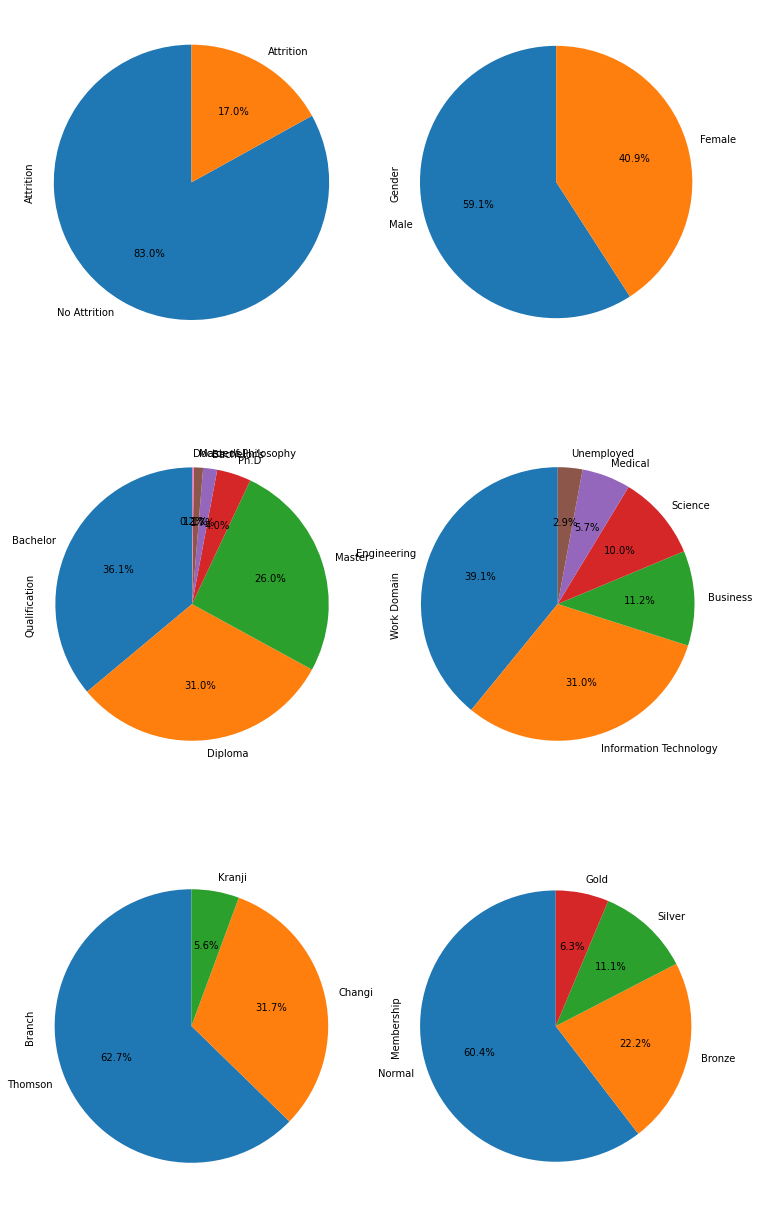

In [26]:
#  (4) EXPLORE QUALITATIVE CATEGORICAL PREDICTORS AND RESPONSE VARIABLES (Pie charts)
# ===================================================================================================================

# Plot the pie charts for all categorical variables: Attrition, Gender, Qualification, work Domain, Branch, Membership

fig = plt.figure(figsize=(12,22))

ax = fig.add_subplot(321)
df_interim1['Attrition'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');

ax = fig.add_subplot(322)
df_interim1['Gender'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');

ax = fig.add_subplot(323)
df_interim1['Qualification'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');

ax = fig.add_subplot(324)
df_interim1['Work Domain'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');

ax = fig.add_subplot(325)
df_interim1['Branch'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');

ax = fig.add_subplot(326)
df_interim1['Membership'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)
plt.axis('equal');

In [27]:
# As the details on pie chart for Qualifications were overlayed, the below summary is generated:

y_val= df_interim1['Qualification'].groupby( [df_interim1['Qualification']]).count()
print (y_val)

Qualification
Bachelor                891
Bachelor's               41
Diploma                 765
Doctor of Philosophy      5
Master                  641
Master's                 27
Ph.D                    100
Name: Qualification, dtype: int64


In [28]:
# From the above groupby details, it was observed that 2 qualifications were duplicated.
# "Bachelor" and "Bachelor's" refer to the same qualification, likewise for "Master" and "Master's"
#
# The following rectification shall be done:
# -  41 counts of "Bachelor's" to be recoded to "Bachelor"
# -  27 counts of "Master's" to be coded to be "Master"

# The below function is to perform the recoding
def recode_qualification(qual_value):
    if qual_value == "Bachelor's":
        qual_value = 'Bachelor'
    elif qual_value == "Master's":
        qual_value= 'Master'
    return qual_value

df_interim1['Qualification']= df_interim1['Qualification'].apply(recode_qualification)                  

In [29]:
# After rectifing the qualification, to regenerate the qualification groupby details, for verification
y_val= df_interim1['Qualification'].groupby( [df_interim1['Qualification']]).count()
print (y_val)

Qualification
Bachelor                932
Diploma                 765
Doctor of Philosophy      5
Master                  668
Ph.D                    100
Name: Qualification, dtype: int64


In [30]:
# Summary of process (4) 
#
# (i) It was observed that the proportion of "Attrition" and "No Attrition" is unbalanced. The "Attrition" is only 
#     17%, and the "No Attrition" made up the remaining 87% of the sampling. 
#
#     The impact of this unbalanced response variable is the necessarity to use confusion matrix such as Sensitivity 
#     and Specificity, in addition to the Accuracy in some of the models' evaluation.
#     Depending on the importance of True positive ('Attrition' to be used), or True Negative ('No Attrition' to
#     be used), different matrices could be used. Cost and Loss functions could also be adopted to assess the model 
#     based on business parameters.
#
#  (2) For the "Qualification" predictor, "Bachelor" and "Bachelor's" coding were aligned, as well as the 
#      "Master" and "Master's" coding were also aligned.
#
# End of (4) EXPLORE QUALITATIVE CATEGORICAL PREDICTORS AND RESPONSE VARIABLES (Pie charts)
# ===================================================================================================================

In [31]:
# (5) EXPLORE QUANTITATIVE CONTINUOUS AND DISCRETE PREDICTORS (Corelation, Heatmap and Pairplots)
# ===================================================================================================================

# Generate correlation matrix for all quantitative predictors
df_interim1.corr()

,Age,Monthly Income,Usage Rate,Months,Birth Year,Usage Time,Travel Time (mins),Usage Hours
Age,1.000000,0.121416,0.039144,0.251364,-0.852001,-0.014599,-0.000205,0.017724
Monthly Income,0.121416,1.000000,-0.033130,0.127521,-0.136557,0.029354,-0.042948,0.002821
Usage Rate,0.039144,-0.033130,1.000000,0.022177,-0.053085,-0.627606,0.004033,0.002531
Months,0.251364,0.127521,0.022177,1.000000,-0.240573,-0.017357,0.042082,-0.002564
Birth Year,-0.852001,-0.136557,-0.053085,-0.240573,1.000000,0.016503,-0.007055,-0.036601
Usage Time,-0.014599,0.029354,-0.627606,-0.017357,0.016503,1.000000,-0.011282,0.627928
Travel Time (mins),-0.000205,-0.042948,0.004033,0.042082,-0.007055,-0.011282,1.000000,-0.003051
Usage Hours,0.017724,0.002821,0.002531,-0.002564,-0.036601,0.627928,-0.003051,1.000000


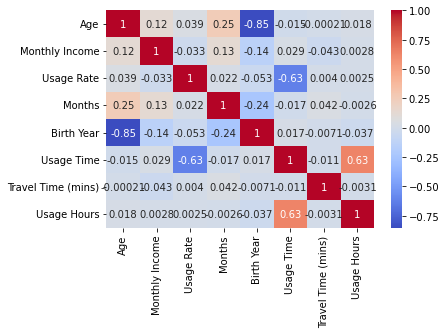

In [32]:
# Generate correlation matrix in a heatmap
sns.heatmap(df_interim1.corr(),annot=True, cmap='coolwarm');


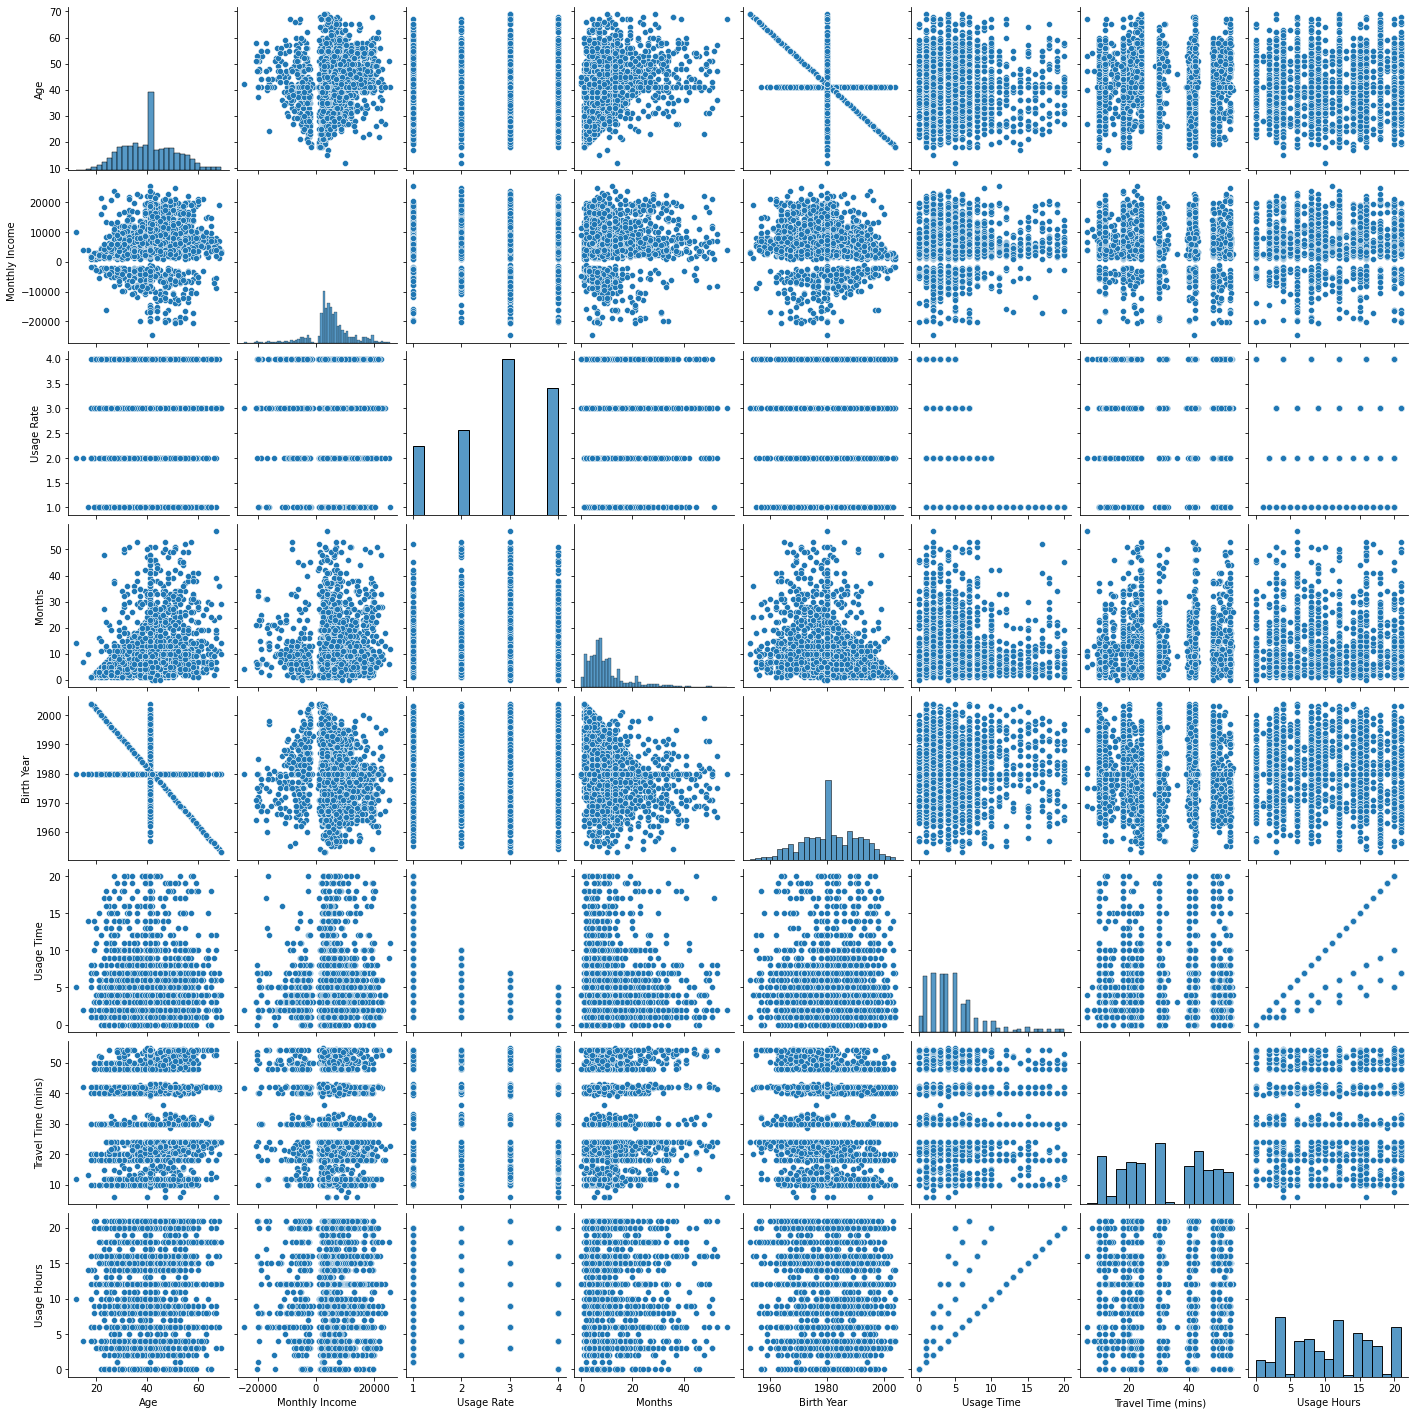

In [33]:
# Generate pairwise relationship using Seaborn pairplot
sns.pairplot(df_interim1);

In [34]:
# Summary of process (5) 
#
# (i) Based on correlation coefficient displayed in the matrix and heatmap, the strength of corrleation among all quantitative
#     variables were weak, except:
#     - Birth Year and Age (at -0.85 which is strong)
#     - Usage Rate and Usage Time (at 0.63 which is moderate)
#     - Usage Hours and Usage Time (at 0.63 which is moderate)
#
#     Together with the pair plot, it can be interpreted that the higher the Birth Year (younger members), the younger is
#     age of the member at the point of signing up, which is valid.
#     Usage Hours in a new column created based on Usage Rate and Usage Time, and thus their corection is moderate.
#    
#
# End of (5) EXPLORE QUALITATIVE CATEGORICAL PREDICTORS AND RESPONSE VARIABLES (Pie charts)
# ===================================================================================================================

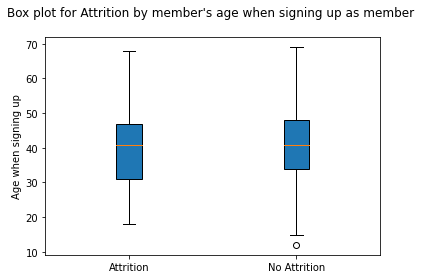

For Attrition:      Median = 40.91     Mean   = 39.70
For NO Attrition:   Median = 40.91     Mean   = 41.16 


In [35]:
#  (6) EXPLORE PREDICTORS AND RESPONSE (Box plots)
# ===================================================================================================================

# Box plot for "Age"

# set up the y values
Att = df_interim1 [df_interim1['Attrition'] == 'Attrition']['Age']
No_Att = df_interim1 [df_interim1['Attrition'] == 'No Attrition']['Age']
y_values = np.array( [Att, No_Att] )

# box plot
x_labels = ['Attrition', 'No Attrition']
plt.boxplot(y_values.transpose(), labels=x_labels, patch_artist=True)
plt.title("Box plot for Attrition by member's age when signing up as member \n" )
plt.ylabel('Age when signing up')
plt.show();

print (f'For Attrition:      Median = {np.median(Att):.2f}     Mean   = {np.mean(Att):.2f}')
print (f'For NO Attrition:   Median = {np.median(No_Att):.2f}     Mean   = {np.mean(No_Att):.2f} ')

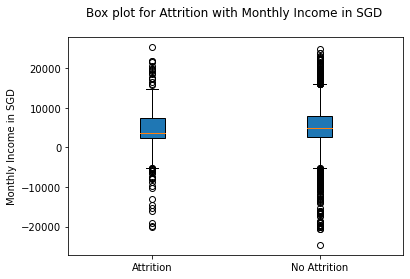

For Attrition:      Median = S$3783.00     Mean   = S$4491.43
For NO Attrition:   Median = S$4968.00     Mean   = S$5276.35 
The outliers need to be clarified at the source. No transformation applied to them yet, as they could be genuiue.


In [36]:
# Box plot for "Monthly Income"

#set up the y values
Att = df_interim1 [df_interim1['Attrition'] == 'Attrition']['Monthly Income']
No_Att = df_interim1 [df_interim1['Attrition'] == 'No Attrition']['Monthly Income']
y_values = np.array( [Att, No_Att] )

# box plot
x_labels = ['Attrition', 'No Attrition']
plt.boxplot(y_values.transpose(), labels=x_labels, patch_artist=True)
plt.title('Box plot for Attrition with Monthly Income in SGD \n')
plt.ylabel('Monthly Income in SGD')
plt.show();

print (f'For Attrition:      Median = S${np.median(Att):.2f}     Mean   = S${np.mean(Att):.2f}')
print (f'For NO Attrition:   Median = S${np.median(No_Att):.2f}     Mean   = S${np.mean(No_Att):.2f} ')
print ('The outliers need to be clarified at the source. No transformation applied to them yet, as they could be genuiue.')

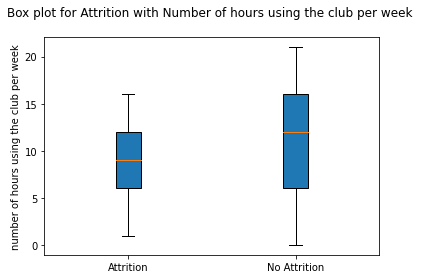

For Attrition:      Median = 9.00     Mean   = 9.29
For NO Attrition:   Median = 12.00     Mean   = 11.27 


In [37]:
# Box plot for "Usage Rate" * "Usage Time"

#set up the y values
Att_1 = df_interim1 [df_interim1['Attrition'] == 'Attrition']['Usage Rate']
Att_2 = df_interim1 [df_interim1['Attrition'] == 'Attrition']['Usage Time']
No_Att_1 = df_interim1 [df_interim1['Attrition'] == 'No Attrition']['Usage Rate']
No_Att_2 = df_interim1 [df_interim1['Attrition'] == 'No Attrition']['Usage Time']
Att=Att_1 * Att_2
No_Att=No_Att_1 * No_Att_2
y_values = np.array( [Att, No_Att] )

# box plot
x_labels = ['Attrition', 'No Attrition']
plt.boxplot(y_values.transpose(), labels=x_labels, patch_artist=True)
plt.title('Box plot for Attrition with Number of hours using the club per week \n')
plt.ylabel('number of hours using the club per week')
plt.show();

print (f'For Attrition:      Median = {np.median(Att):.2f}     Mean   = {np.mean(Att):.2f}')
print (f'For NO Attrition:   Median = {np.median(No_Att):.2f}     Mean   = {np.mean(No_Att):.2f} ')

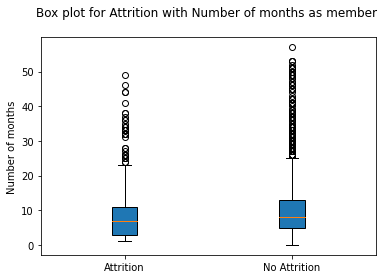

For Attrition:      Median = 7.00     Mean   = 9.49
For NO Attrition:   Median = 8.00     Mean   = 10.87 
The outliers need to be clarified at the source. No transformation applied to them yet, as they could be genuiue.


In [38]:
# Box plot for "Months"

#set up the y values
Att = df_interim1 [df_interim1['Attrition'] == 'Attrition']['Months']
No_Att = df_interim1 [df_interim1['Attrition'] == 'No Attrition']['Months']
y_values = np.array( [Att, No_Att] )

# box plot
x_labels = ['Attrition', 'No Attrition']
plt.boxplot(y_values.transpose(), labels=x_labels, patch_artist=True)
plt.title('Box plot for Attrition with Number of months as member \n')
plt.ylabel('Number of months')
plt.show();

print (f'For Attrition:      Median = {np.median(Att):.2f}     Mean   = {np.mean(Att):.2f}')
print (f'For NO Attrition:   Median = {np.median(No_Att):.2f}     Mean   = {np.mean(No_Att):.2f} ')
print ('The outliers need to be clarified at the source. No transformation applied to them yet, as they could be genuiue.')

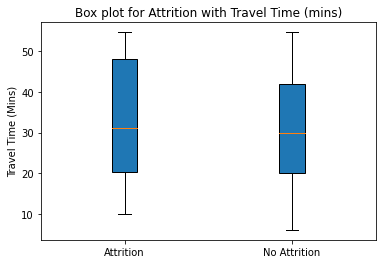

For Attrition:      Median = 31.23     Mean   = 33.81
For NO Attrition:   Median = 30.00     Mean   = 31.87 


In [39]:
# Box plot for "Travel Time"

#set up the y values
Att= df_interim1 [df_interim1['Attrition'] == 'Attrition']['Travel Time (mins)']
No_Att= df_interim1 [df_interim1['Attrition'] == 'No Attrition']['Travel Time (mins)']
y_values = np.array( [Att, No_Att] )

# box plot
x_labels = ['Attrition', 'No Attrition']
plt.boxplot(y_values.transpose(), labels=x_labels, patch_artist=True)
plt.title('Box plot for Attrition with Travel Time (mins)')
plt.ylabel('Travel Time (Mins)')
plt.show();

print (f'For Attrition:      Median = {np.median(Att):.2f}     Mean   = {np.mean(Att):.2f}')
print (f'For NO Attrition:   Median = {np.median(No_Att):.2f}     Mean   = {np.mean(No_Att):.2f} ')

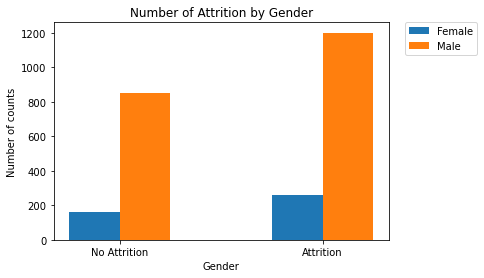

In [40]:
# Group Bar Chart

# For Gender, breakdown by Attrition and No Attrition

Att_Bar= df_interim1 [df_interim1['Attrition'] == 'Attrition']
No_Att_Bar= df_interim1 [df_interim1['Attrition'] == 'No Attrition']

Att_y= Att_Bar['Gender'].groupby( [Att_Bar['Gender']]).count()
No_Att_y= No_Att_Bar['Gender'].groupby( [No_Att_Bar['Gender']]).count()

# plotting grouped bar chart
x= ['No Attrition','Attrition']
x_axis = np.arange(len(x))
width = 1

plt.bar(x_axis*4 - 2, Att_y, width, label = 'Female')
plt.bar(x_axis*4 - 1, No_Att_y, width, label = 'Male')

plt.xticks(x_axis*4-1.5, x)

plt.xlabel("Gender")
plt.ylabel("Number of counts")
plt.title("Number of Attrition by Gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',borderaxespad=0)
plt.show()

In [41]:
# Summary of process (6)

# (i) By plotting box plots for different quantitative predictors by Attrition, it shows the distribution of data 
#     in predicting of Attrition or not visually.
#     Box plots also show the mean, median, presence of outliers, Inter-quartile range of the predictors.
#
# (ii) As the scale for quantitative variables differs, such as the "Month Income" (which is in SGD dollars in ten of 
#      thousands), Usage rate (which is number of times visiting club per week), etc, re-scaling will be needed 
#      for models sensitive to the distance.
#
# End of (6) EXPLORE PREDICTORS AND RESPONSE (Box plots)
# ===================================================================================================================

In [42]:
# (7) CONCLUSION AND FOLLOWUP TO TASK 2
# ===================================================================================================================
#
#  (i) List of data preparation activities recommended for Task 2 includes:
#      - Recode column "Attrition" response variable
#      - Standardise the data in "Travel Time" column to use common unit in mins
#      - Replace "Age" with "-1" (or interpreted as missing values), with the mean of Age
#      - Replace "Birth Year" with "-1" (or interpreted as missing values), with the mode of Birth Year
#      - Drop the unmeaningful "Member Unique ID" and Inconsistent "Travel Time" columns
#      - Create a new interaction column "Usage Hours" to store the total hours spent in the club per week
#      - For the "Qualification" predictor, "Bachelor" and "Bachelor's" coding to be aligned as one value, as well as the 
#        "Master" and "Master's" coding is to be aligned too
#      Note that the above mentioned activities were carried out and verified in this EDA processes.
#
# (ii) The proportion of "Attrition" and "No Attrition" is unbalanced. The former contrinbuted to 17% with the "No Attrition" 
#      made up the remaining 87% of the sampling. 
#
# (iii) The models to be trained in Task 2 are supervised (with labelled response data), for classification of "Attrition" or
#       "No Attrition". Models relevant based on the data exploration includes KNN, Decision Tree , Logistics Regression, etc
#
#  End of program